# MNIST 손글씨 - CNN(Convolutional Neural Network)

### 데이터 전처리

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 숫자 이미지 보기

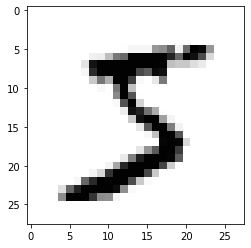

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 0~1 사이의 값으로 정규화
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
# 이미지 데이터가 2차원이므로 3차원으로 변경해 주어야 함
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# y 값의 One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### CNN 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),   
    #Conv2D(32, input_shape=X_train.shape[1:], activation='relu')
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               18874880  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),   
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 4,743,050
Trainable params: 4,743,050
Non-trainable params: 0
____________________________________________

In [8]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),   
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [10]:
# 모델 최적화와 조기 종료를 위한 설정
modelpath = 'best_mnist_cnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
earlystop = EarlyStopping(patience=5)

In [11]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, callbacks=[checkpoint, earlystop]
)

Epoch 1/50
240/240 [==============================] - 35s 14ms/step - loss: 0.2211 - accuracy: 0.9326 - val_loss: 0.0620 - val_accuracy: 0.9819

Epoch 00001: val_loss improved from inf to 0.06200, saving model to best_mnist_cnn.h5
Epoch 2/50
240/240 [==============================] - 3s 13ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0430 - val_accuracy: 0.9873

Epoch 00002: val_loss improved from 0.06200 to 0.04301, saving model to best_mnist_cnn.h5
Epoch 3/50
240/240 [==============================] - 3s 13ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0423 - val_accuracy: 0.9876

Epoch 00003: val_loss improved from 0.04301 to 0.04228, saving model to best_mnist_cnn.h5
Epoch 4/50
240/240 [==============================] - 3s 13ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0425 - val_accuracy: 0.9872

Epoch 00004: val_loss did not improve from 0.04228
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 0.0290 - accuracy: 0.9904 - val

In [17]:
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9901


[0.030023932456970215, 0.9901000261306763]

### 훈련과정 시각화

In [19]:
import numpy as np
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

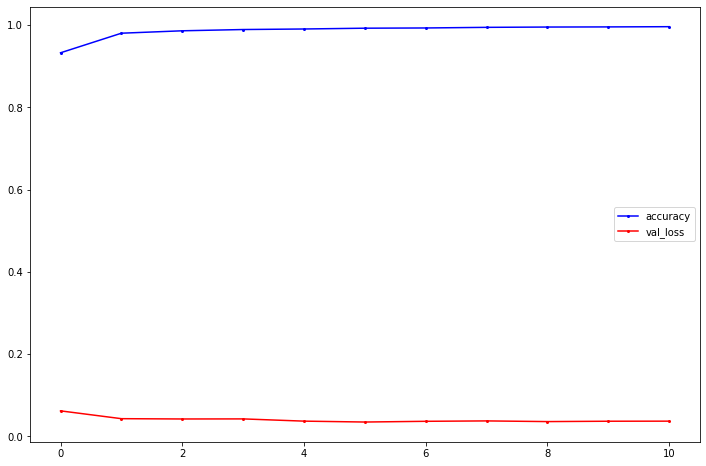

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()
